In [98]:
### https://www.cs.toronto.edu/~kriz/cifar.html

In [99]:
from keras.datasets import cifar10

In [100]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [101]:
# normalise data -> make the numbers smaller for better results

import numpy as np

x_train = x_train.astype(np.float32) / 255.
x_test = x_test.astype(np.float32) / 255.

[1]


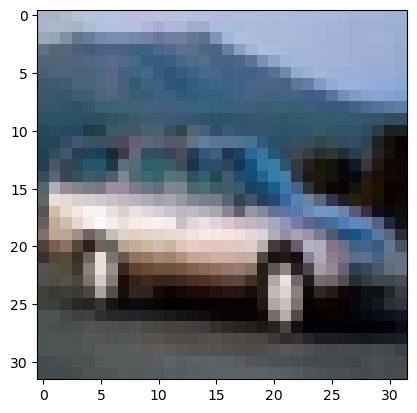

In [102]:
%matplotlib inline

import matplotlib.pyplot as plt

print(y_train[4])
plt.imshow(x_train[4])
plt.show()

In [103]:
print(x_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 1)


In [104]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation="relu"))

model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

In [105]:
# get true if car else false
y_train = y_train == 1

model.fit(x_train, y_train, batch_size=128, epochs=10, shuffle=True)

Epoch 1/10
391/391 [==============================] - 18s 45ms/step - loss: 0.2412 - accuracy: 0.9112
Epoch 2/10
391/391 [==============================] - 17s 45ms/step - loss: 0.1789 - accuracy: 0.9302
Epoch 3/10
391/391 [==============================] - 17s 43ms/step - loss: 0.1571 - accuracy: 0.9390
Epoch 4/10
391/391 [==============================] - 16s 40ms/step - loss: 0.1460 - accuracy: 0.9431
Epoch 5/10
391/391 [==============================] - 18s 46ms/step - loss: 0.1346 - accuracy: 0.9485
Epoch 6/10
391/391 [==============================] - 21s 53ms/step - loss: 0.1239 - accuracy: 0.9528
Epoch 7/10
391/391 [==============================] - 20s 52ms/step - loss: 0.1129 - accuracy: 0.9574
Epoch 8/10
391/391 [==============================] - 21s 54ms/step - loss: 0.1028 - accuracy: 0.9616
Epoch 9/10
391/391 [==============================] - 19s 50ms/step - loss: 0.0927 - accuracy: 0.9659
Epoch 10/10
391/391 [==============================] - 19s 49ms/step - loss: 0.080

In [106]:
model.evaluate(x_train, y_train)

1563/1563 [==============================] - 9s 6ms/step - loss: 0.0642 - accuracy: 0.9789


[0.06422583758831024, 0.978879988193512]

In [107]:
# get true if car else false
y_test = y_test == 1

model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.1261 - accuracy: 0.9494


[0.12610384821891785, 0.949400007724762]

[ True]


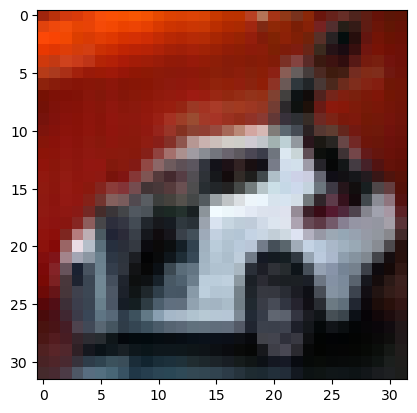

In [108]:
print(y_test[6])
plt.imshow(x_test[6])
plt.show()

In [109]:
p = x_test[6].reshape(1,32,32,3)
p.shape

(1, 32, 32, 3)

In [110]:
model.predict(p)

1/1 [==============================] - 0s 84ms/step


array([[0.996869]], dtype=float32)